workspace > vision 안에 MNIST 폴더 새로 만들기

MNIST 안에 cats_and_dogs 폴더 새로 만들기

슬랙에서 3개 압축 파일 다운로드 후, cats_and_dogs 안에 각각 압축 풀기

# CNN에서 필요한 라이브러리 IMPORT

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential     
from tensorflow.keras.layers import Conv2D, MaxPooling2D         
from tensorflow.keras.layers import Flatten, Dense           
                                                                 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator             

# Dataset 디렉터리 정의

In [2]:
train_dir = "./MNIST/cats_and_dogs/train"
test_dir = "./MNIST/cats_and_dogs/test"

# ImageDataGenerator 생성

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255)   # 0과 1 사이의 값으로 정규화
test_datagen = ImageDataGenerator(rescale=1/255)

# Train Data, Test data 마련

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,                   # 학습용 이미지를 가져올 폴더명
    classes=["cats", "dogs"],    # cats 폴더의 image는 label을 0으로
                                 # dogs 폴더의 image는 label을 1로 설정
    target_size=(150, 150),     # 이미지를 (150, 150)으로 resize
    batch_size=20,              # 한 번에 20개의 이미지만 가져옴
    class_mode="binary"         # 이진 분류 (개와 고양이)
)


test_generator = train_datagen.flow_from_directory(
    test_dir,                     # 평가용 이미지를 가져올 폴더명
    classes=["cats", "dogs"],    # cats 폴더의 image는 label을 0으로
                                 # dogs 폴더의 image는 label을 1로 설정
    target_size=(150, 150),      # 이미지를 (150, 150)으로 resize
    batch_size=20,               # 한 번에 20개의 이미지만 가져옴
    class_mode="binary"          # 이진 분류 (개와 고양이)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# CNN Model 구현

In [5]:
model = Sequential()

model.add(Conv2D(filters=32,    # conv2D에서의 Node ; 32 * 3 * (3*3) + 32(bias) = 896 
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation="relu",
                 input_shape=(150, 150, 3)))  
                 
model.add(Conv2D(filters=64,   # conv2D에서의 Node ; 32 * 64 * (3 * 3) + 64 = 18,496 
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation="relu"))
          
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,   # conv2D에서의 Node ; 64 * 64 * (3 * 3) + 64 = 36,928(36,864) 
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation="relu"))
          
######## ( 여기까지가 CNN의 Feature Extraction ) ########
          
# Fully Connection(DNN)의 input_layer
model.add(Flatten())   # 전체 데이터를 4차원에서 1차원으로 변경
          
# hidden Layer
model.add(Dense(units=128,
                activation="relu"))
        
# Output Layer
model.add(Dense(units=1,  
                activation="sigmoid"))   # 0과 1 (이진 분류)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               41296000  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [7]:
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=["accuracy"])

# 설정이 다 되었으면 모델 학습  

In [8]:
hist = model.fit(train_generator,
          steps_per_epoch=100,
          epochs=30,   # 전체 데이터 총 30번 학습
          verbose=1,
          validation_data=test_generator,  # ( 검증 데이터가 직접 들어감 )
          validation_steps=50
          )

Epoch 1/30
100/100 [==============================] - 19s 145ms/step - loss: 0.6932 - accuracy: 0.5710 - val_loss: 0.6634 - val_accuracy: 0.5610
Epoch 2/30
100/100 [==============================] - 14s 142ms/step - loss: 0.6029 - accuracy: 0.6800 - val_loss: 0.6164 - val_accuracy: 0.6800
Epoch 3/30
100/100 [==============================] - 16s 158ms/step - loss: 0.5339 - accuracy: 0.7370 - val_loss: 0.6051 - val_accuracy: 0.6850
Epoch 4/30
100/100 [==============================] - 14s 140ms/step - loss: 0.4239 - accuracy: 0.8215 - val_loss: 0.6099 - val_accuracy: 0.6770
Epoch 5/30
100/100 [==============================] - 14s 140ms/step - loss: 0.3153 - accuracy: 0.8900 - val_loss: 0.6312 - val_accuracy: 0.6860
Epoch 6/30
100/100 [==============================] - 14s 140ms/step - loss: 0.2223 - accuracy: 0.9245 - val_loss: 0.6697 - val_accuracy: 0.6790
Epoch 7/30
100/100 [==============================] - 14s 141ms/step - loss: 0.1445 - accuracy: 0.9625 - val_loss: 0.7723 - val_ac

# 그래프로 출력

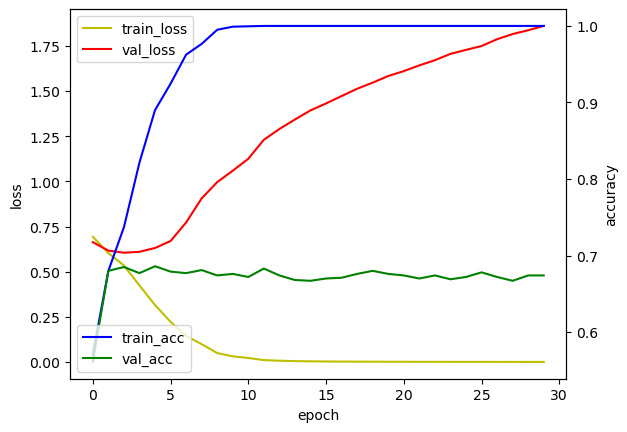

In [9]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")